In [2]:
%%html
<style>
    div {
        font-size: 16px;
    }
    .emph {
        background-color: #EEEEEE;
        padding: 10px 10px 10px 10px;
        margin: 20px 0px 20px 0px;
        color: #552222;
        font-style: italic;
        font-size: 16px;
    }
    .img-txt-container {
        display: grid;
        grid-template-columns: 20% 76%;
        grid-gap: 4% 4%;
        text-align: justify;
        margin: 20px 0px 20px 0px;
    }
    .img-larger {
        grid-template-columns: 40% 56%;
    }
    .thumb-img {
        width: 100%;
        height: auto;
    }
    .code {
        font-family: Lucida Console;
        font-size: 16px;
    }
    .tab {
        padding-left: 30px;
        border-left: 1px solid;
    }
</style>


<script>
    var code_show=false;
    function code_toggle() {
        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    
    function changeImage(direc) {
        if ( typeof image_id == 'undefined' ) {
            image_id = 0;
        }
        if(direc == 'zero') {
            image_id = 0;
        }
        if(direc == 'next') {
            image_id = image_id+1;
        }
        if(direc == 'prev') {
            image_id = image_id-1;
        }
        if(image_id >= 50) {
            image_id = 0;
        }
        if(image_id < 0){
            image_id = 49;
        }
        if (document.getElementById("plot")){
            document.getElementById("plot").src = "plots/plot"+ image_id +".png";
            document.getElementById("plot_id").placeholder = image_id;
        }
    }
    
    $( document ).ready(code_toggle);
    $( document ).ready(changeImage);
</script>

<a href="javascript:code_toggle()">[Esconder Código]</a>

# Artificial Bee Colony

Índice

- [Introdução](#Introdução)
- [Comportamento das Abelhas](#Comportamento-das-Abelhas)
    - [Fontes de alimento](#Fontes-de-alimento)
    - [Abelhas empregadas](#Abelhas-empregadas)
    - [Abelhas Desempregadas](#Abelhas-desempregadas)
    - [Waggle Dance](#Waggle-dance)
- [Algoritmo](#Algoritmo)
    - [Pseudo-código](#Pseudo-código)
    - [Abelha](#Abelha)
    - [Enxame](#Enxame)
- [Experimentos](#Experimentos)
    - [Parâmetros](#Parâmetros)
    - [Rastrigin](#Rastrigin)
    - [Ackley](#Ackley)
    - [Egg Holder](#Egg-Holder)
- [Aumento de complexidade](#Aumento-de-complexidade)

## Introdução

Inteligência de enxame (<i>Swarm Intelligence</i> - SI) é um tópico de muito interesse na área de algoritmos de otimização.

<div class="emph">
    "São qualquer tentativa de desenvolver algoritmos ou dispositivos distribuídos para solução de problemas inspirados no comportamento coletivo de colônias de insetos sociais e outras sociedades de animais [1]."
</div>

<b>Exemplos:</b>

- Pássaros
- Cupins
- Formigas
- Abelhas
- Vespas
- Morcegos
- Vagalumes
- Gatos loucos
- Fogos de artifício
- Sistema gravitacional
- Dinâmica da formação de rios
- Gotejamento
- Sistema imune
- Bactérias
- Relações altruístas

Algoritmos de SI precisam ter:
<br>
<p><b style="margin-left: 20px;">Auto-organização</b>: o estabelecimento de regras de iteração entre os componentes do sistema.</p>
<p><b style="margin-left: 20px;">Divisão de tarefas</b>: as diferentes tarefas são executadas por indivíduos especializados, possibilitando a resposta eficiente à mudanças no ambiente.</p>
    
<br>
<img style="width: 25%;" src="media/bio-inpired_computing.png"/>
<center>Divisão dos algoritmos bio-inspirados [2].</center>

<br>
O algoritmo <b>Colônia Artificial de Abelhas</b> (<i>Artificial Bee Colony</i> - ABC) foi descrito em 2005 por Karaboga [3], e se baseia no comportamento de colônias de abelhas produtoras de mel para criação de um algoritmo de otimização numérica.

Ao longo da apresentação vamos seguir diminuindo a abstração e chegando ao nível de implementação.

## Comportamento das Abelhas

Um modelo minimalista para descrever o comportamento coletivo inteligente de abelhas coletoras de néctar contém três componentes:
- Fontes de alimento
- Abelhas empregadas
- Abelhas desempregadas

### Fontes de alimento
(<em>Food Sources</em>)

<div class="img-txt-container">
    <img class= "thumb-image" src="media/flower.png"/>
    <div>
        <p>O valor da fonte de alimentação vai depender de diversos fatores: </p>
            - Proximidade ao ninho. <br>
            - Valor ou concentração. <br>
            - Facilidade de extração. <br> <br>
        <p>Por simplicidade, a <b>rentabilidade</b> da fonte pode ser representada por uma única quantidade [4].</p>
    </div>
</div>

### Abelhas empregadas

<em>(Employed Foragers)</em>

<div class="img-txt-container">
    <img class= "thumb-image" src="media/bee_flower.png"/>
    <div>
        <p>São associadas com uma fonte de alimento em particular que estão correntemente explorando. Elas estão "empregadas" nesta fonte.</p>
        <p>Elas carregam consigo informação sobre a fonte que estão explorando e compartilham esta informação com uma certa probabilidade.</p>
    </div>
</div>

### Abelhas desempregadas

<em>(Unemployed Foragers)</em>

<div class="img-txt-container">
    <img class= "thumb-image" src="media/approach_flower.png"/>
    <div>
        <p>Estão continuamente procurando por novas fontes de alimento para explorar.</p>
        <p>Elas podem ser separadas em:<p>
        - <b>Escoteiras</b> (<em>Scouts</em>): efetivamente procuram por novas fontes <br>
        - <b>Observadoras</b> (<em>Onlookers</em>): Esperam na colmeia e escolhem fontes de alimento correntemente exploradas pelas empregadas. <br>
        <p>O número de scouts geralmente varia entre 5-10% da população.</p>
    </div>
</div>

### Waggle dance

A troca de informação entre as abelhas é a ocorrência mais importante na formação de conhecimento coletivo.

A comunicação sobre fontes de alimento e sua qualidade ocorre na <b>área de dança</b> do ninho através da <i>waggle dance</i>.
<br><br>



In [193]:
%%html

<video style="width: 80%; margin-left: 10%;" controls>
    <source src="media/waggle_dance.mp4" type="video/mp4">
    <source src="media/waggle_dance.webm" type="video/webm">
</video>


<br>
A abelha empregada vai exibir uma <i>waggle dance</i> mais intensa se estiver comunicando sobre uma fonte de alimento bastante rentável.

A abelha observadora pode ver várias <i>waggle dances</i> e seguir para a fonte que achar mais promissora.

<div class="emph">
    Portanto, o recrutamento é proporcional à rentabilidade da fonte de alimento.
</div>

<b>Exploração</b> (<i>exploration</i>): conduzida por scouts <br>
<b>Intensificação</b> (<i>exploitation</i>): conduzida por empregadas e observadoras.


Resumindo...

<img style="width: 100%;" src="media/bee_summary.png">

## Algoritmo

Procedimento iterativo

Distribuição das tarefas:

<em>Empregadas</em> &#8594; 50% da população
<ul>
<li>Representadas por soluções codificadas individuais para o problema (fontes de alimento). </li>
<li>Cada abelha recebe um fitness associado com a qualidade de sua solução.</li>
<li>A cada iteração a abelha realiza uma "movimentação", tentando melhorar sua solução.</li>
</ul>

<em>Observadoras</em> &#8594; 50% da população
<ul>
<li>Primeiramente calcula-se a probabilidade de uma solução ser visitada.</li>
<li>As observadoras visitarão essa solução proporcionalmente.</li>
<li>Uma visita significa uma movimentação extra na solução associada.</li>
</ul>

<em>Escoteiras</em> &#8594; máximo de 1 indivíduo por iteração
<ul>
<li>Cada solução possui um contador (<i>trial</i>).</li>
<li>Se a solução melhora em uma movimentação, $trial\leftarrow~0$, senão, $trial\leftarrow~trial+1$.</li>
<li>Quando $trial=limit$, a solução é abandonada. Ou seja, a empregada associada vira uma <i>scout</i></li>
</ul>


### Pseudo código
<br>
<div class="code">
    Enviar as escoteiras para as fontes de alimento iniciais <br>
    REPETIR <br>
        <div class="tab">
            PARA(empregadas)
            <div class="tab">
                Movimentar abelha <br>
                Determinar sua quantidade de néctar <br>
                Atualizar <i>trial</i> <br>
            </div>
            FIM-PARA
            <br><br>
            PARA(empregadas)
            <div class="tab">
                Calcular a probabilidade de as fontes serem preferidas pelas observadoras <br>
            </div>
            FIM-PARA
            <br><br>
            PARA(observadoras)
            <div class="tab">
                Enviar observadora <br>
                Determinar a quantidade de néctar <br>
                Atualizar <i>trial</i> <br>
            </div>
            FIM-PARA
            <br><br>
            SE(existe escoteira)
            <div class="tab">
                Enviar a escoteira para uma nova localização aleatória <br>
            </div>
            FIM-SE
            <br><br>
            Memorizar a melhor solução encontrada  <br>
        </div>
    ATÉ(condições satisfeitas)
</div>

### Abelha

Esta classe representa as empregadas no processo.

Tudo que elas sabem é:
<ul>
<li>Os limites do espaço</li>
<li>O fitness de sua solução</li>
<li>O método de movimentação</li>
<li>O <i>trial</i> atual da solução</li>
</ul>

O método de perturbação (<i>perturbation</i>) de uma solução leva em consideração a posição relativa de outra abelha empregada para realizar a movimentação.

\begin{equation}
    X_{i,j}' \leftarrow X_{i,j} + \phi~(X_{i,j}-X_{k,j})
\end{equation}

Se a nova solução é melhor que a anterior, a posição é atualizada.

\begin{equation}
    X_{i,j} \leftarrow X_{i,j}'
\end{equation}

Exemplo:

<img src="media/pert_ex1.png">
<img src="media/pert_ex2.png">


In [2]:
import numpy as np

class Bee:
    def __init__(self, evalFunc, dim, boundaries):
        # O construtor recebe a função de avaliação, número de dimensões do
        # problema e os limites mínimo e máximo do espaço de busca.
        self.evalFunc = evalFunc
        self.D = dim
        self.lb = boundaries[0]
        self.ub = boundaries[1]
        # Inicializa posição da abelha, valores de fitness e valor da função 
        # objetivo na posição da abelha.
        # Trial é inicializado com zero.
        self.x = np.zeros(dim)
        self.fitness = float("-inf")
        self.f = float("inf")
        self.trial = 0
    
    
    def init(self):
        # Inicia a posição de uma abelha e calcula seu fitness (ou reinicia a
        # posição caso esta seja uma scout).
        self.x = np.random.uniform(self.lb, self.ub, self.D);
        self.f = self.evalFunc(self.x, self.D)
        self.fitness = self.calcFitness(self.f)
        self.trial = 0;

    
    def perturbation(self, refX):
        # Modifica a posição da abelha conforme a posição de referência 
        # recebida (refX).
        # Seleciona aleatoriamente uma coordenada para ser modificada, realiza
        # o deslocamento e atualiza a posição apenas se o fitness foi melhorado.
        newX = np.copy(self.x)
        pc = np.random.randint(self.D)
        shift = (np.random.rand()-0.5)*2 #[-1,+1]
        
        newX[pc] = newX[pc] + (newX[pc]-refX[pc])*shift
        newX[pc] = np.clip(newX[pc], self.lb, self.ub)
        
        newF = self.evalFunc(newX, self.D)
        newFitness = self.calcFitness(newF)
        # Atualiza posição se fitness melhorou
        if newFitness > self.fitness:
            self.trial = 0
            self.x = np.copy(newX)
            self.f = newF
            self.fitness = newFitness
        else:
            self.trial += 1
            
    
    def calcFitness(self, f):
        # Cálculo do fitness é diretamente baseado na função objetivo
        # Não existem fitnesses negativos. Isso é feito para a seleção por
        # roleta na fase de onlooker bees.
        fitness = 0.0
        if f >= 0:
            fitness = 1.0/(f+1)
        else:
            fitness = 1.0 + abs(f)
        
        return fitness;

### Enxame

O algoritmo pode ser dividido em quatro fases:
<ul>
    <li>Empregadas</li>
    <li>Observadoras</li>
    <li>Scouts</li>
    <li>Memorizar melhor solução</li>
</ul>

Essas quatro fases são relacionadas na função <i>iterate</i> e realizam as seguintes atividades:

<b>Fase das empregadas:</b>
<ul>
    <li>Para cada abelha, realiza uma perturbação na solução</li>
</ul>
<b>Fase das observadoras:</b>
<ul>
    <li>Constrói uma roleta com os valores de fitness</li>
    <li>Faz a seleção em forma <i>aproximada</i> da roleta</li>
    <li>Realiza a perturbação na solução selecionada</li>
</ul>
<b>Fase das scouts:</b>
<ul>
    <li>Seleciona abelha com maior <i>trial</i></li>
    <li>Se $trial \ge limit$, abelha é reiniciada</li>
</ul>
<b>Memorizar melhor solução:</b>
<ul>
    <li>Armazena a posição da abelha com melhor fitness</li>
</ul>

In [3]:
class ArtificialBeeColony:
    def __init__(self, NP, limit, evalFunc, dim, boundaries):
        # O construtor recebe o número de abelhas do enxame, o número máximo
        # de tentativas (trial), a função de avaliação, o número de dimensões
        # do problema e os limites máximo e mínimo do espaço de busca.
        self.NP = NP
        self.SN = NP // 2
        self.limit = limit;
        self.evalFunc = evalFunc
        # Mínimo encontrado e sua localização
        self.globalMin = float("inf")
        self.globalPos = np.zeros(dim)
        # Inicia abelhas empregadas
        self.bees = [];
        for i in range(self.SN):
            self.bees.append(Bee(evalFunc, dim, boundaries))
            self.bees[i].init()
            
    
    def iterate(self):
        # Realiza as fases do algoritmo
        self.sendEmployedBees()
        self.sendOnLookerBees()
        self.sendScoutBees()
        self.memorizeBestSource()
    
    
    def sendEmployedBees(self):
        # Causa perturbações nas posições das abelhas empregadas, tentando
        # melhorá-las.
        for i in range(self.SN):
            self.updateSolution(i)
    
    
    def sendOnLookerBees(self):
        # Abelhas observadoras são enviadas proporcionalmente ao fitness de uma
        # das soluções atuais (abelhas empregadas). Esta função realiza os
        # passos: 1_ calcular probabilidade, 2_ enviar observadoras
        
        # Calcula probabilidade das soluções serem preferidas pelas observadoras
        maxFit = self.bees[0].fitness;
        for bee in self.bees:
            if bee.fitness > maxFit:
                maxFit = bee.fitness
        
        prob = np.zeros(self.SN)
        for i in range(self.SN):
            fit = self.bees[i].fitness
            prob[i] = (0.9*(fit/maxFit))+0.1
        
        # Envia abelhas observadoras para as soluções
        i = 0
        t = 0
        while t < self.SN:
            if np.random.rand() < prob[i]:
                t += 1
                self.updateSolution(i)
            i += 1
            i = i % self.SN
    
    
    def sendScoutBees(self):
        # Primeiramente seleciona a abelhas que teve mais tentativas sem
        # sucesso do melhoramento de sua solução.
        # Depois transforma esta abelha em uma scout. Teremos no máximo uma
        # scout por iteração.
        maxTrialIndex = 0;
        for i in range(self.SN):
            if self.bees[i].trial > self.bees[maxTrialIndex].trial:
                maxTrialIndex = i
        
        if self.bees[maxTrialIndex].trial >= self.limit:
            self.bees[maxTrialIndex].init()
    
    
    def memorizeBestSource(self):
        # Memoriza melhor solução encontrada
        for bee in self.bees:
            if bee.f < self.globalMin:
                self.globalMin = bee.f
                self.globalPos = np.copy(bee.x)
    
    
    def updateSolution(self, i):
        # Realiza a perturbação da posiçãod a abelha i
        neighbor = np.random.randint(self.SN)
        while self.SN > 1 and neighbor == i:
            neighbor = np.random.randint(self.SN)
        
        self.bees[i].perturbation(self.bees[neighbor].x)
    
    def swarm_stat(self):
        fit = np.zeros(self.SN)
        for i in range(self.SN):
            fit[i] = self.bees[i].f
        
        return (fit.mean(), fit.std())

## Experimentos

Nesta seção observaremos o comportamento do algoritmo sob algumas funções clássicas da literatura.

### Parâmetros

O ABC pede três parâmetros de entrada:
<ol>
    <li>Número de iterações
    <ul>
        <li>Está relacionado com a quantidade de processamento que se quer dar.</li>
    </ul></li>
    <li>Tamanho da população
    <ul>
        <li>Recomenda-se um tamanho de população entre 50 e 100 para problemas mais complexos [5].</li>
    </ul></li>
    <li><i>Limit</i>
    <ul>
        <li>Usualmente definido como $limit\leftarrow~NS*D$ [1][5].</li>
    </ul></li>
</ol>

### Rastrigin

<div class="img-txt-container img-larger">
    <img class= "thumb-image" src="media/rastrigin.png"/>
    <div>
        <p>$f_1(x)=10D+\sum_{i=1}^{D}(x_i^2-10cos(2\pi x_i))$</p>
        <br>
        <p>Limites: $[-5.12, +5.12]$</p>
        <p>Mínimo: $f(0,0,...,0)=0.0$</p>
    </div>
</div>

In [5]:
import numpy as np

def rastrigin(sol, dim):
        top = 0.0
        for i in range(dim):
            xi  = sol[i]
            top = top + ((xi**2) - 10*np.cos(2*np.pi*xi))

        return 10*dim + top

boundaries = [-5.12, 5.12]

<b>Execução:</b>

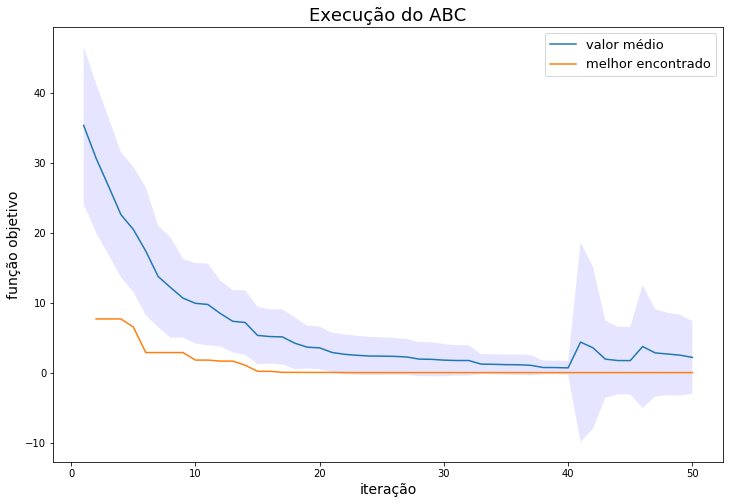

Melhor solução encontrada:
f(0.000009 , -0.000029) = 0.0000001820


In [12]:
from IPython.core.display import display, HTML
from executa_abc import executa_abc


popSize= 30;
iterations = 50;
dimensionality = 2

executa_abc(popSize, iterations, rastrigin, boundaries, dimensionality)

### Ackley

<div class="img-txt-container img-larger">
    <img class= "thumb-image" src="media/ackley.png"/>
    <div>
        <p>$f_2(x)=20+e-20exp \left( -0.2\sqrt{\frac{1}{D}\sum_{i=1}^{D}x_i^2} \right)$</p>
        <br>
        <p>Limites: $[-32.768, 32.768]$</p>
        <p>Mínimo: $f(0,0,...,0)=0.0$</p>
    </div>
</div>

In [7]:
def ackley(sol, dim):
    a = 20
    b = 0.2
    c = 2*np.pi
    d = dim
    
    sum1 = 0.0
    sum2 = 0.0

    for i in range(d):
        xi = sol[i]
        sum1 = sum1 + xi**2
        sum2 = sum2 + np.cos(c*xi)

        term1 = -a*np.exp(-b*np.sqrt(sum1/d))
        term2 = -np.exp(sum2/d)

    return term1 + term2 + a + np.exp(1)

boundaries = [-32.768, 32.768]

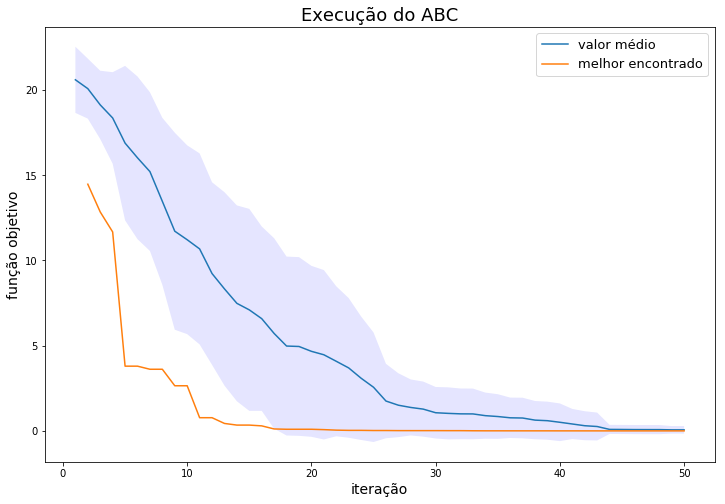

Melhor solução encontrada:
f(-0.000001 , 0.000028) = 0.0000788286


In [19]:
popSize= 30;
iterations = 50;
dimensionality = 2

executa_abc(popSize, iterations, ackley, boundaries, dimensionality)

### Egg Holder

<div class="img-txt-container img-larger">
    <img class= "thumb-image" src="media/egg.png"/>
    <div>
        <p>$f_3(x)=418.9829D+\sum_{i=1}^{D}-x_i~sin(\sqrt{\left|x_i\right|})$</p>
        <br>
        <p>Limites: $[-512, +512]$</p>
        <p>Mínimo: $f[-512, 404.2319]=-959.6407$</p>
    </div>
</div>

In [8]:
def eggHolder(sol, dim=2):
    x1 = sol[0]
    x2 = sol[1]

    term1 = -(x2+47) * np.sin(np.sqrt(abs(x2+x1/2.0+47)))
    term2 = -x1      * np.sin(np.sqrt(abs(x1-(x2+47))))

    return term1 + term2

boundaries = [-512, 512]

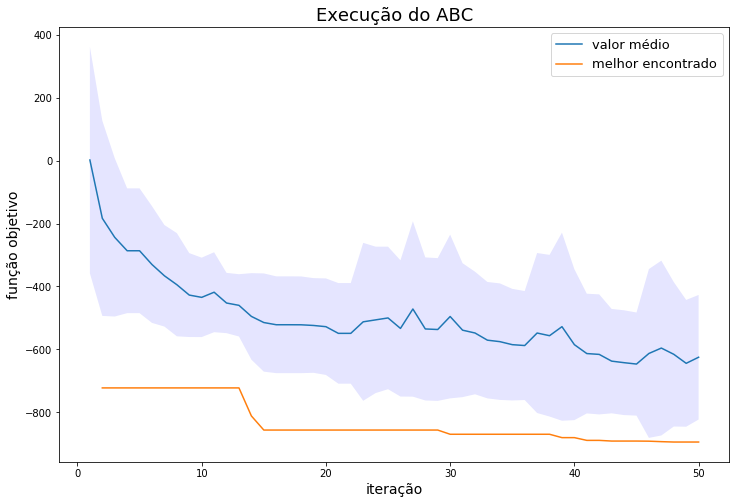

Melhor solução encontrada:
f(-464.839173 , 384.528190) = -894.1512009307


In [14]:
popSize= 30;
iterations = 50;
dimensionality = 2

executa_abc(popSize, iterations, eggHolder, boundaries, dimensionality)

In [11]:
%%html

<img id="plot" style="margin: 0 auto 0 auto;" src="plots/plot0.png"/>

<div style="text-align: center;">
    <button type="submit" id="btn1" onclick="changeImage('prev')">Anterior</button>
    <input id="plot_id" style="width:50px; text-align:center;" type="text" placeholder="0">
    <button type="submit" id="btn1" onclick="changeImage('next')">Próxima</button>
    <button type="submit" id="btn1" onclick="changeImage('zero')">Reset</button>
</div>

### Aumento de complexidade

Abaixo as curvas de convergência das funções Rastrigin e Ackley com 30 dimensões.

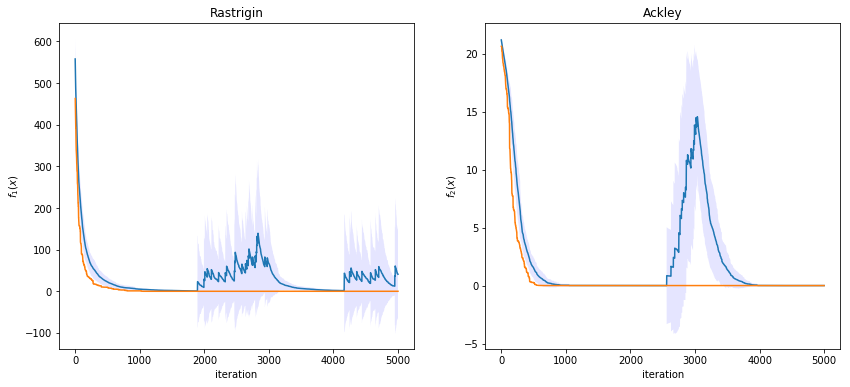

Best Found:
Rastrigin =  0.0
Ackley =  2.886579864025407e-14


In [14]:
import matplotlib.pyplot as plt


iterations = 5000
popSize = 50
dimensionality = 30
limit = (popSize // 2) * dimensionality

# Rastrigin
boundaries = [-5.12, 5.12]
abc = ArtificialBeeColony(popSize, limit, rastrigin, dimensionality, boundaries)

convergence_curve = np.zeros(iterations)
mean_value = np.zeros(iterations)
std_value = np.zeros(iterations)
min_rastrigin = 0.0

for i in range(iterations):
    convergence_curve[i] = abc.globalMin
    m,s = abc.swarm_stat()
    mean_value[i] = m
    std_value[i]  = s
    abc.iterate()
min_rastrigin = abc.globalMin
    
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.plot(range(iterations), mean_value)
plt.fill_between(range(iterations), mean_value+std_value, mean_value-std_value, facecolor='blue', alpha=0.1)
plt.plot(range(iterations), convergence_curve)
plt.title('Rastrigin')
plt.ylabel('$f_1(x)$')
plt.xlabel('iteration')

# Ackley
boundaries = [-32.768, 32.768]
abc = ArtificialBeeColony(popSize, limit, ackley, dimensionality, boundaries)

convergence_curve = np.zeros(iterations)
mean_value = np.zeros(iterations)
std_value = np.zeros(iterations)
min_ackley = 0.0

for i in range(iterations):
    convergence_curve[i] = abc.globalMin
    m,s = abc.swarm_stat()
    mean_value[i] = m
    std_value[i]  = s
    abc.iterate()
min_ackley = abc.globalMin

plt.subplot(1, 2, 2)
plt.plot(range(iterations), mean_value)
plt.fill_between(range(iterations), mean_value+std_value, mean_value-std_value, facecolor='blue', alpha=0.1)
plt.plot(range(iterations), convergence_curve)
plt.title('Ackley')
plt.ylabel('$f_2(x)$')
plt.xlabel('iteration')

plt.show()

print('Best Found:')
print('Rastrigin = ', min_rastrigin)
print('Ackley = ', min_ackley)

### Parâmetro <i>limit</i>

No experimento abaixo, fazemos $limit=50$

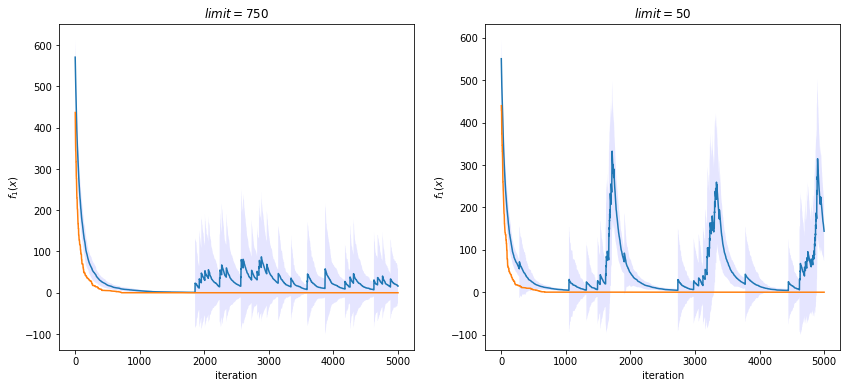

Best Found:
Rastrigin (limit=750) =  0.0
Rastrigin (limit=50)=  1.91562321560923e-11


In [16]:
iterations = 5000
popSize = 50
dimensionality = 30
limit = (popSize // 2) * dimensionality

# Rastrigin
boundaries = [-5.12, 5.12]
abc = ArtificialBeeColony(popSize, limit, rastrigin, dimensionality, boundaries)

convergence_curve = np.zeros(iterations)
mean_value = np.zeros(iterations)
std_value = np.zeros(iterations)
min_rastrigin = 0.0

for i in range(iterations):
    convergence_curve[i] = abc.globalMin
    m,s = abc.swarm_stat()
    mean_value[i] = m
    std_value[i]  = s
    abc.iterate()
min_rastrigin = abc.globalMin
    
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.plot(range(iterations), mean_value)
plt.fill_between(range(iterations), mean_value+std_value, mean_value-std_value, facecolor='blue', alpha=0.1)
plt.plot(range(iterations), convergence_curve)
plt.title('$limit=750$')
plt.ylabel('$f_1(x)$')
plt.xlabel('iteration')

# Rastrigin limit
limit = 50
abc = ArtificialBeeColony(popSize, limit, rastrigin, dimensionality, boundaries)

convergence_curve = np.zeros(iterations)
mean_value = np.zeros(iterations)
std_value = np.zeros(iterations)

for i in range(iterations):
    convergence_curve[i] = abc.globalMin
    m,s = abc.swarm_stat()
    mean_value[i] = m
    std_value[i]  = s
    abc.iterate()
min_rastrigin2 = abc.globalMin

plt.subplot(1, 2, 2)
plt.plot(range(iterations), mean_value)
plt.fill_between(range(iterations), mean_value+std_value, mean_value-std_value, facecolor='blue', alpha=0.1)
plt.plot(range(iterations), convergence_curve)
plt.title('$limit=50$')
plt.ylabel('$f_1(x)$')
plt.xlabel('iteration')

plt.show()

print('Best Found:')
print('Rastrigin (limit=750) = ', min_rastrigin)
print('Rastrigin (limit=50)= ', min_rastrigin2)

## Bibliografia

[1] E. Bonabeau, M. Dorigo, G. Theraulaz, “Swarm Intelligence: From Natural to Artificial Systems”, New York, NY: Oxford University Press, 1999.

[2] B. Alsalibi, I. Venkat, K.G. Subramanian, S. Lutfi, P. De Wilde. "The Impact of Bio-Inspired Approaches Toward the Advancement of Face Recognition". ACM Comput. Surv, v. 48, 2015.

[3] D. Karaboga, "An Idea Based on Honey Bee Swarm for Numerical Optimization". Technical Report-TR06, Erciyes University, 2005.

[4] T. D. Seeley, "The Wisdom of the Hive", Cambridge, MA:Harvard University Press, 1995.

[5] D. Karaboga, B. Basturk, "On the performance of artificial bee colony (ABC) algorithm". Applid Soft Compututing, v. 8, n. 1, 2008.